# Statistical hypothesis testing

URL https://github.com/FIIT-IAU/

**We want to verify whether the number of engine cylinders has an effect on consumption.**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

In [3]:
cars = pd.read_csv('data/auto-mpg.data', 
                   delim_whitespace=True, 
                   names = ['mpg', 'cylinders', 'displacement','horsepower',
                            'weight', 'acceleration', 'model_year', 'origin', 'name'],
                   na_values='?')
cars.head()

/tmp/ipykernel_36210/3615078874.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cars = pd.read_csv('data/auto-mpg.data',


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Homework

a. Check if the difference in fuel consumption between 4-cylinder and 6-cylinder engines is statistically significant.

b. Check if the difference in fuel consumption between 4-cylinder and 5-cylinder engines is statistically significant.

c. An even better approach is to use a statistical test that allows for the comparison of multiple groups at once. The generalization of the t-test for multiple groups is called **ANOVA (Analysis of Variance)**.

In [28]:
def prepare_data(name: str, group: pd.Series, ax):
    iqr = stats.iqr(group)

    is_outlier = group > group.quantile(0.75) + 1.5 * iqr
    is_outlier |= group < group.quantile(0.25) - 1.5 * iqr

    group = group.drop(group[is_outlier].index)

    sm.ProbPlot(group, fit=True).qqplot(line='45', ax=ax)
    ax.set_title(name)
    
    normality_value = stats.shapiro(group).pvalue
    print(f"Group '{name}' has a shapiro pvalue of {normality_value}, therefore it {'is' if normality_value > 0.05 else 'is not'} normal distribution")

    return group

Group '4 cylinder' has a shapiro pvalue of 0.002672989706430087, therefore it is not normal distribution
Group '5 cylinder' has a shapiro pvalue of 0.6017929346111854, therefore it is normal distribution
Group '6 cylinder' has a shapiro pvalue of 0.12478518880578532, therefore it is normal distribution


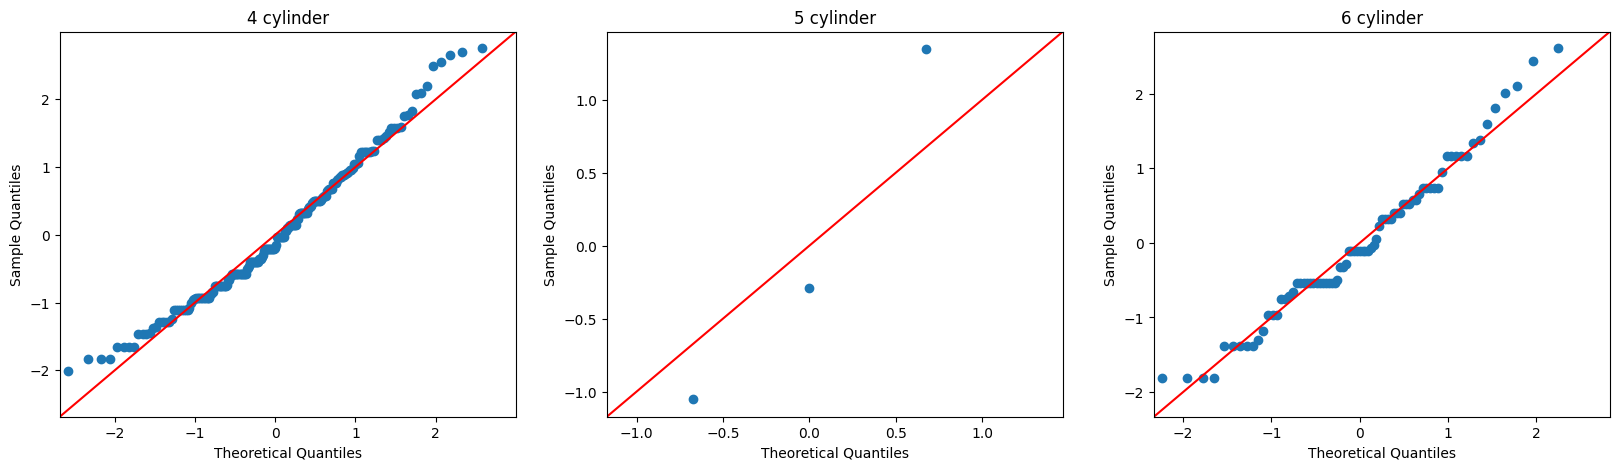

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

mpg_4_cylinder = prepare_data("4 cylinder", cars.loc[cars.cylinders == 4, 'mpg'], axes[0])
mpg_5_cylinder = prepare_data("5 cylinder", cars.loc[cars.cylinders == 5, 'mpg'], axes[1])
mpg_6_cylinder = prepare_data("6 cylinder", cars.loc[cars.cylinders == 6, 'mpg'], axes[2])

## Point A

Because, according to the Shapiro-Wilk test, samples of 4 cylinder engines do not come from a normal distribution, we have to use a non-parametric Mann-Whitney U-test.

**$H_0$ (null hypothesis)**: The difference of consumption between samples of 4 cylinder and 5 cylinder engines are statistically significant.

**$H_A$ (alternative hypothesis)**: The difference of consumption between samples of 4 cylinder and 5 cylinder engines are not statistically significant.

In [43]:
pvalue = stats.mannwhitneyu(mpg_4_cylinder, mpg_5_cylinder).pvalue

if pvalue < 0.001:
    print(f"pvalue = {pvalue} => Null hypothesis confirmed, the difference of consumption is statistically significant")
else:
    print(f"pvalue = {pvalue} => Null hypothesis rejected, the difference of consumption is not statistically significant")

pvalue = 0.571278103562181 => Null hypothesis rejected, the difference of consumption is not statistically significant


## Point B

Because, according to the Shapiro-Wilk test, samples of 4 cylinder engines do not come from a normal distribution, we have to use a non-parametric Mann-Whitney U-test.

**$H_0$ (null hypothesis)**: The difference of consumption between samples of 4 cylinder and 6 cylinder engines are statistically significant.

**$H_A$ (alternative hypothesis)**: The difference of consumption between samples of 4 cylinder and 6 cylinder engines are not statistically significant.

In [45]:
pvalue = stats.mannwhitneyu(mpg_4_cylinder, mpg_6_cylinder).pvalue

if pvalue < 0.001:
    print(f"pvalue = {pvalue} => Null hypothesis confirmed, the difference of consumption is statistically significant")
else:
    print(f"pvalue = {pvalue} => Null hypothesis rejected, the difference of consumption is not statistically significant")

pvalue = 7.6391524456552e-34 => Null hypothesis confirmed, the difference of consumption is statistically significant


## Point C

To compare multiple groups we use the ANOVA test.


In [48]:
pvalue =  stats.f_oneway(mpg_4_cylinder, mpg_5_cylinder, mpg_6_cylinder).pvalue

if pvalue < 0.001:
    print(f"pvalue = {pvalue} => Null hypothesis confirmed, the difference of consumption is statistically significant")
else:
    print(f"pvalue = {pvalue} => Null hypothesis rejected, the difference of consumption is not statistically significant")

pvalue = 3.007730547662562e-37 => Null hypothesis confirmed, the difference of consumption is statistically significant


## Point B

Because, according to the Shapiro-Wilk test, samples of 5 cylinder and 6 cylinder engines come from a normal distribution, we may be able to use the parametric Student's T-test. But first we have to verify that both datasets have equal variance.

**$H_0$ (null hypothesis)**: Samples of 5 cylinder and 6 cylinder engines have equal variance.

**$H_A$ (alternative hypothesis)**: Samples of 5 cylinder and 6 cylinder engines do not have equal variance.

In [37]:
pvalue = stats.levene(mpg_5_cylinder, mpg_6_cylinder).pvalue

if pvalue < 0.05:
    print(f"pvalue = {pvalue} => Null hypothesis confirmed, both datasets have equal variance")
else:
    print(f"pvalue = {pvalue} => Null hypothesis rejected, both datasets do not have equal variance")

pvalue = 0.0007006889151918965 => Null hypothesis confirmed, both datasets have equal variance


Because both datasets have equal variance we can use Student's T-test.

**$H_0$ (null hypothesis)**: The difference of consumption between samples of 5 cylinder and 6 cylinder engines are statistically significant.

**$H_A$ (alternative hypothesis)**: The difference of consumption between samples of 5 cylinder and 6 cylinder engines are not statistically significant.

In [40]:
pvalue = stats.ttest_ind(mpg_5_cylinder, mpg_6_cylinder).pvalue

if pvalue < 0.001:
    print(f"pvalue = {pvalue} => Null hypothesis confirmed, the difference of consumption is statistically significant")
else:
    print(f"pvalue = {pvalue} => Null hypothesis rejected, the difference of consumption is not statistically significant")

pvalue = 1.8213168522407373e-06 => Null hypothesis confirmed, both the difference of consumption is statistically significant
